In [145]:
import pandas as pd
import numpy as np
import sklearn
data = pd.read_csv("data/ionosphere.data",header=None)

# Νευρωνικά Δίκτυα 
## Εργασία 1
### team 27
Αυγερινού Ανδριάνα  03116192 <br>
Βασιλείου Μαρία 03116167<br>
Γκέγκας Δημήτριος 03116004


# Μικρό DataSet (S07)

## Βασικές πληροφορίες

### 1. Σύντομη παρουσίαση του Dataset


Το πρώτο dataset που θα εξετάσουμε είναι το [Ionosphere](http://archive.ics.uci.edu/ml/datasets/Ionosphere).  Πρόκειται για μία συλλογή από δεδομένα κεραιών που συλλέχτηκαν από το Goose Bay εργαστήριο. Συγκεκριμένα τα σήματα από τις 16 κεραίες  υψηλής συχνότητας επεξεργαστήκαν με μία αυτοσυχετική συνάρτηση και τα αποτελέσματα είναι 17 μιγαδική αριθμοί που αντιστοιχούν στο ηλεκτρομαγνητικό σήμα. Παρακάτω βλέπουμε την αυτοσυχετική συνάρτηση $R$<br>
$$R(t,k)=\sum_{i=0}^{16} C(t + iT)C^*[t + (i + k)T]$$ <br>
όπου $k$ = pulse number (0,16) <br>
$T$ =pulse repetition period <br>
$C(t)$ = received signal

Τα δεδομένα παρουσιάζουν για κάποιο pulse pattern εάν η Ιονόσφαιρα έχει την συγκεκριμένη δομή. Οπότε μιλάμε για ένα πρόβλημα δυαδικής ταξινόμησης ( "good" , "bad")


In [146]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


### 2. Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά;

To dataset περιέχει 351 δείγματα, με 34 χαρακτηριστικά και την κλάση όπου ανήκει το δείγμα.  Τα χαρακτηριστικά είναι συνεχή και κανονικοποιημένα στο διάστημα $[-1,1]$ . Δεν έχουμε μη διατεταγμένα χαρακτηριστικά.

### 3. Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;

Το dataset δεν περιέχει επικεφαλίδες, ούτε αρίθμηση γραμμών.

### 4. Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολόνα βρίσκονται; 

Η ετικέτες των κλάσεων βρίσκονται στην τελευταία στήλη και έχουνε τιμές ‘g’ και ‘b’ που αντιστοιχούν στις κλάσεις “good” και “bad” αντίστοιχα. 

### 5. Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες; 

Από το dataset πήραμε τις 34 πρώτες στήλες ώς features και την τελευταία στήλη ως labels. Τα labels τα μετατρέψαμε σε αριθμητική τιμή (0,1). Όπου 1 αντιστοιχεί στην κλάση "good" και 0 στην κλάση "bad".

In [147]:
labels=(data[34]=="g").to_numpy().astype(int)
features=data.drop(labels=34,axis=1).to_numpy()

### 6. Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου; 

Τα δεδομένα μας δεν περιέχουν missing values. 

In [148]:
data.isnull().values.any()

False

### 7. Ποιος είναι ο αριθμός των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Αν θεωρήσουμε ότι ένα dataset είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (60%-40% σε binary datasets) εκτιμήστε την ισορροπία του dataset.

Έχουμε δύο κλάσεις, την "good" και την "bad" που αντιστοιχούν σε label 1 και 0.

In [149]:
Pgood=100*sum(labels==1)/len(labels)
Pbad=100*sum(labels==0)/len(labels)
print("Το "+str(round(Pgood,2)) + "% των δεδομένων είναι good και το υπόλοιπο " +str(round(Pbad,2))+ "% είναι bad")
print("Η ισορροπία του dataset "+str(round(Pgood/Pbad,2)))

Το 64.1% των δεδομένων είναι good και το υπόλοιπο 35.9% είναι bad
Η ισορροπία του dataset 1.79


### 8. Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.

Χωρίζουμε τα χαρακτηριστικά μας σε train και test sets.

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(features,labels,test_size=0.2,shuffle=True,random_state=20204)

# Ταξινόμηση

Σε αυτό το dataset θα δούμε τους 3 παρακάτω Classifiers: 
* Dummy Classifier: όπου χρησιμοποιείται ως βάση για την αξιολόγηση των υπόλοιπων Classifier.
* K - Νearest Neighbors: όπου κάνει πρόβλεψη με βάση του K κοντινότερους γείτονες. Συγκεκριμένα επιστρέφει την κλάση στην οποία ανήκουν οι περισσότεροι από αυτούς τους γείτονες.
* Gaussian Naïve Bayes Classifier: Ένα Bayes Classifier ταξινομεί το δείγμα X στην κλάση 𝑪𝒚 σύμφωνα με τον παρακάτω κανόνα. 
$$y= argmax_{k \in (1,2,...,N)} {P(C_k)*P(X|C_k)} $$
Ενώ ένας Naïve Bayes Classifier για να απλοποιήσει το μοντέλο κάνει την υπόθεση ότι τα χαρακτηριστικά του κάθε δείγματος είναι ανεξάρτητα και ασυσχέτιστα μεταξύ τους. Έτσι καταλήγει στον παρακάτω απλοποιημένο κανόνα.
$$y= argmax_{k \in (1,2,...,N)} {P(C_k)\prod_{i=0}^F P(x_i|C_k)} $$

In [151]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from IPython.display import Markdown as md

### Baseline Classification

### 1. Διαχειριστείτε τυχόν απουσιάζουσες τιμές. Εκπαιδεύστε στο train τους classifiers με default τιμές (απλή αρχικοποίηση). Κάντε εκτίμηση στο test set (μαζί με τους dummy) και τυπώστε για κάθε estimator: confusion matrix, f1-micro average και f1-macro average.

### 2. Για κάθε averaged metric, εκτυπώστε bar plot συγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers.

### 3. Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης

Παρακάτω βλέπουμε τις μετρικές με βάση τις οποίες θα αξιολογήσουμε τους classifiers μας. <br>

Ακρίβεια -Precision- ( P ) είναι ο λόγος των true positives ( Tp ) ως προς τον αριθμό των true positives συν τον αριθμό των false positives ( Fp ).

$$ P = { T_p \over {T_p+F_p}}$$ 

Ανάκληση -Recall- ( R ) είναι ο λόγος των true positives ( Tp ) ως προς τον αριθμό των true positives συν τον αριθμό των false negatives ( Fn ).

$$R = {{T_p} \over{ T_p+F_n}}$$ 

Συχνά χρησιμοποιούμε και το ( F1 ) score, το οποίο είναι ο αρμονικός μέσος της ακρίβειας και της ανάκλησης.

$$F_1= 2  {   {P×R}\over{P+R}}$$

Κάθε μία από τις παραπάνω μετρικές αναφέρεται σε μία κλάση. Για να βρούμε το αποτέλεσμα για τον Classifier πρέπει να πάρουμε έναν μέσο όρο. Θα χρησιμοποιήσουμε δύο avg τακτικές, την micro και την macro. <br> 
Με την macro ουσιαστικά παίρνουμε έναν μέσο όρο ως προς τον αριθμό των κλάσεων. Ενώ με την micro παίρνουμε τον μέσο όρο του κάθε δείγματος. Στην περίπτωση μας η micro avg ισοδυναμεί με ένα weight avg, όπου έχουμε τον μέσο όρο τον κλάσεων με βάρος το ποσοστό των δειγμάτων στο dataset. 

In [175]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

def show_evaluation(X_test,y_test,clf_list,labels,ticklabel):
    for clf,name in zip(clf_list,labels):
        print(name)
        predict=clf.predict(X_test)
        report=classification_report(y_test,predict,labels=list(range(len(ticklabel))),target_names=ticklabel)
        print("The classification report for "+name)
        print(report)
        print("The confusion matrix for "+name)
        sns.heatmap(confusion_matrix(y_test,predict),xticklabels=ticklabel,yticklabels=ticklabel)
        plt.show()


def show_metrics(X_test,y_test,clf_list,labels,ticklabel):
    f1_micro=[]
    f1_macro=[]
    recall_micro=[]
    recall_macro=[]
    precision_micro=[]
    precision_macro=[]
    for clf,name in zip(clf_list,labels):
        predict=clf.predict(X_test)
        report=classification_report(y_test,predict,labels=list(range(len(ticklabel))),target_names=ticklabel)
        macro=precision_recall_fscore_support(y_test, predict, average='macro')
        micro=precision_recall_fscore_support(y_test, predict, average='micro')
        precision_macro.append(macro[0])
        precision_micro.append(micro[0])
        recall_macro.append(macro[1])
        recall_micro.append(micro[1])
        f1_macro.append(macro[2])
        f1_micro.append(micro[2])
    print("# Metrics for all classifiers")
    # width of the bars
    barWidth = 0.1
    # The x position of bars
    r1 = np.arange(len(f1_micro))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    r5 = [x + barWidth for x in r4]
    r6 = [x + barWidth for x in r5]
    # Create blue bars
    plt.bar(r1, f1_micro, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='f1_micro')
    # Create cyan bars
    plt.bar(r2, f1_macro, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='f1_macro')
    # Create blue bars
    plt.bar(r3, recall_micro, width = barWidth, color = 'pink', edgecolor = 'black', capsize=7, label='recall_micro')
    # Create cyan bars
    plt.bar(r4, recall_macro, width = barWidth, color = 'red', edgecolor = 'black', capsize=7, label='recall_macro')
    # Create blue bars
    plt.bar(r5, precision_micro, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='precision_micro')
    # Create cyan bars
    plt.bar(r6, precision_macro, width = barWidth, color = 'yellow', edgecolor = 'black', capsize=7, label='precision_macro')
    
    # general layout
    plt.xticks([r + barWidth for r in range(len(f1_micro))], labels,rotation=45)
    plt.ylabel('F1 metric')
    plt.legend(loc='lower right')

    # Show graphic
    plt.show()

In [159]:
# init classifiers
clf_Dummy=DummyClassifier(strategy="stratified")
clf_KNN=KNeighborsClassifier(n_jobs=-1)
clf_GNB=GaussianNB()

#fit train set's data
clf_Dummy=clf_Dummy.fit(X_train,y_train)
clf_KNN=clf_KNN.fit(X_train,y_train)
clf_GNB=clf_GNB.fit(X_train,y_train)

Dummy
The classification report for Dummy
              precision    recall  f1-score   support

         Bad       0.33      0.35      0.34        23
        Good       0.68      0.67      0.67        48

    accuracy                           0.56        71
   macro avg       0.51      0.51      0.51        71
weighted avg       0.57      0.56      0.57        71

The confusion matrix for Dummy


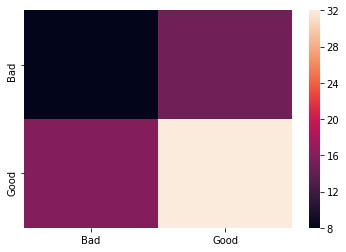

In [160]:
show_evaluation(X_test,y_test,[clf_Dummy],["Dummy"],["Bad","Good"])

Όπως παρατηρούμε ο Dummy classifier έχει macro avg F1 43%, ενώ micro avg 50%. Αυτό συμβαίνει καθώς το dataset μας έχει περισσότερα “good” δείγματα, διότι δεν είναι ισορροπημένο. Στην κλάση “good” ο dummy έχει αρκετά καλύτερη απόδοση στην ταξινόμηση των δειγμάτων σε σχέση με τα “bad” οπότε ένας weighted μέσος όρος έχει καλύτερα αποτελέσματα από έναν macro. Για τον ίδιο λόγο το accuracy έχει υψηλό επίπεδο, ενώ βλέπουμε ότι κανένα από τα δείγματα της “bad” δεν ταξινομείται σωστά. Γενικά, θέλουμε trade-off μεταξύ της micro και macro μετρικής.

KNN
The classification report for KNN
              precision    recall  f1-score   support

         Bad       0.93      0.57      0.70        23
        Good       0.82      0.98      0.90        48

    accuracy                           0.85        71
   macro avg       0.88      0.77      0.80        71
weighted avg       0.86      0.85      0.83        71

The confusion matrix for KNN


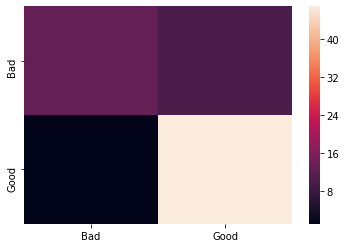

In [12]:
show_evaluation(X_test,y_test,[clf_KNN],["KNN"],["Bad","Good"])

Βλέποντας τώρα τον KNN classifier, έχουμε εμφανώς καλύτερα αποτελέσματα. Έχουμε recall για την κλάση “good” στο 98%, το οποίο σημαίνει ότι τα δείγματα της “good” ταξινομούνται σωστά. Βλέπουμε από την άλλη ένα αρκετά καλό precision της “bad” κλάσης (93%), το οποίο αρχικά θα ήταν misleading εάν δεν βλέπαμε τις υπόλοιπες μετρικές. Καθώς το recall της “bad” είναι πολύ χαμηλό, καταλαβαίνουμε ότι το υψηλό ποσοστό στο precision οφείλεται στην μείωση των False Positive για την κλάση “bad” (ταξινομήθηκαν στην κλάση “bad” ένω είναι “good”) καθώς ταξινομούνται αρκετά καλά τα “good” δείγματα.

GNB
The classification report for GNB
              precision    recall  f1-score   support

         Bad       0.84      0.91      0.87        23
        Good       0.96      0.92      0.94        48

    accuracy                           0.92        71
   macro avg       0.90      0.91      0.91        71
weighted avg       0.92      0.92      0.92        71

The confusion matrix for GNB


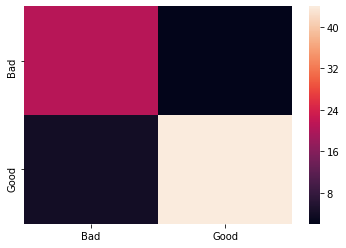

In [13]:
show_evaluation(X_test,y_test,[clf_GNB],["GNB"],["Bad","Good"])

Τέλος, ο GNB πετυχαίνει, χωρίς καμία βελτιστοποίηση, ένα accuracy 92%, με την F1 μετρική να είναι επίσης 92% (για micro και 91% για macro). Αυτό φαίνεται και στο confusion matrix όπου έχουμε αρκετά καλή εικόνα της επίδοσης του classifier. Από τους τρεις classifiers φαίνεται να έχει την καλύτερη απόδοση και την μικρότερη διακύμανση στις μετρικές. Παρατηρούμε ότι, παρα το γεγονός ότι η recall και για τις δύο κλάσεις είναι στο 91-92%, έχουμε απόκλιση των τιμών στο precision. Αυτό οφείλεται στο γεγονός ότι τα “bad” δεδομένα έχουν λιγότερα δείγματα, οπότε κάθε classifier θα είναι σε θέση να εκπαιδευτεί καλύτερα πάνω στα “good” δεδομένα από τα “bad”.

# Metrics for all classifiers


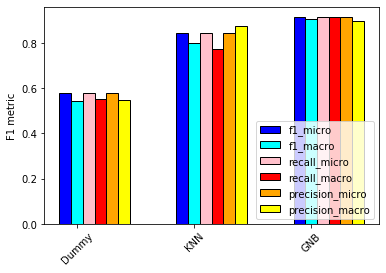

In [14]:
show_metrics(X_test,y_test,[clf_Dummy,clf_KNN,clf_GNB],["Dummy","KNN","GNB"],["Bad","Good"])


Στο τελευταίο διάγραμμα φαίνονται καλύτερα όλες οι μετρικές και για τους τρεις classifiers. Ο dummy είναι σαφώς υποδεέστερος απ’ τους άλλους δύο αλλά μας χρησιμεύει ως ένα κατώφλι απόδοσης για τις παρακάτω προσπάθειες βελτιστοποίησης του classification.

## Βελτιστοποίηση ταξινομητών

Στην συνέχεια, θα προσπαθήσουμε να βελτιστοποιήσουμε τους παραπάνω classifiers με την διαδικασία του preprocessing 

In [15]:
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai ΄όχι ως scale()
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

def get_best_parameters(X_train, y_train,untrained_estimators,labels):
    estimators=[]
    f1_micro=[]
    f1_macro=[]
    recall_micro=[]
    recall_macro=[]
    precision_micro=[]
    precision_macro=[]
    time_train=[]
    param=[]
    for estimator,name in zip(untrained_estimators,labels):
        start_time = time.time()
        trained=estimator.fit(X_train, y_train)
        estimators.append(trained)
        preds = estimator.predict(X_test)
        macro=precision_recall_fscore_support(y_test, preds, average='macro')
        micro=precision_recall_fscore_support(y_test, preds, average='micro')
        precision_macro.append(macro[0])
        precision_micro.append(micro[0])
        recall_macro.append(macro[1])
        recall_micro.append(micro[1])
        f1_macro.append(macro[2])
        f1_micro.append(micro[2])
        time_train.append(time.time() - start_time)
        param.append(estimator.best_params_)
    result_para_total=[]
    for para in param:
        result_para=[]
        for s,i in para.items():
            result_para.append((s.split("__")[1],i))
        result_para_total.append(result_para)
    stats=pd.DataFrame(data={"precision (macro)":precision_macro ,"precision (micro)":precision_micro,"recall (macro)" : recall_macro , "recall (micro)" : recall_micro ,"f1 (macro)" :f1_macro ,"f1 (micro)":f1_micro  , "time to train" :time_train, "parameters": result_para_total },index=labels)
    return (estimators,stats)

In [16]:
train_variance = X_train.var(axis=0)
print(train_variance)

[0.09566327 0.         0.2441664  0.18393794 0.26589746 0.20169667
 0.22771267 0.27190032 0.27213169 0.2398717  0.31354157 0.24472723
 0.39410788 0.24360579 0.44043537 0.20021932 0.39665148 0.23530026
 0.42086954 0.26182952 0.37079406 0.2671549  0.34871054 0.27541214
 0.32905711 0.25569679 0.27255545 0.29659084 0.32732609 0.24636971
 0.31897467 0.25589764 0.25724828 0.199455  ]


In [17]:
from sklearn.model_selection import GridSearchCV
vthreshold = [0,0.1,0.2,0.3]
k = [1,3, 5,7, 9, 11, 21, 31] # η υπερπαράμετρος του ταξινομητή kNN

In [18]:
selector = VarianceThreshold()
ros = RandomOverSampler()

scoring=["f1_micro","f1_macro"]

pipe_Dummy = Pipeline(steps=[('selector', selector), ('sampler', ros), ('dummy', clf_Dummy)], memory = 'tmp')
pipe_GNB = Pipeline(steps=[('selector', selector), ('sampler', ros), ('gnb', clf_GNB)],memory = 'tmp')
pipe_KNN = Pipeline(steps=[('selector', selector), ('sampler', ros), ('knn', clf_KNN)], memory = 'tmp')


estimator_Dummy_micro = GridSearchCV(pipe_Dummy, dict(selector__threshold=vthreshold), cv=10, scoring='f1_micro', n_jobs=-1)
estimator_GNB_micro = GridSearchCV(pipe_GNB, dict(selector__threshold=vthreshold), cv=10, scoring='f1_micro', n_jobs=-1)
estimator_KNN_micro = GridSearchCV(pipe_KNN, dict(selector__threshold=vthreshold,knn__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)

 
estimator_Dummy_macro = GridSearchCV(pipe_Dummy, dict(selector__threshold=vthreshold), cv=10, scoring='f1_macro', n_jobs=-1)
estimator_GNB_macro = GridSearchCV(pipe_GNB, dict(selector__threshold=vthreshold), cv=10, scoring='f1_macro', n_jobs=-1)
estimator_KNN_macro = GridSearchCV(pipe_KNN, dict(selector__threshold=vthreshold,knn__n_neighbors=k), cv=10, scoring='f1_macro', n_jobs=-1)

In [19]:
import time
untrained_estimators=[estimator_Dummy_micro,estimator_GNB_micro,estimator_KNN_micro,estimator_Dummy_macro,estimator_GNB_macro,estimator_KNN_macro]
labels=["Dummy_micro","GNB_micro","KNN_micro","Dummy_macro","GNB_macro","KNN_macro"]

estimators, stats= get_best_parameters(X_train, y_train,untrained_estimators,labels)

In [20]:
stats.style.background_gradient(cmap ='RdYlBu') 

,precision (macro),precision (micro),recall (macro),recall (micro),f1 (macro),f1 (micro),time to train,parameters
Dummy_micro,0.558468,0.535211,0.56567,0.535211,0.529234,0.535211,7.53558,"[('threshold', 0.2)]"
GNB_micro,0.898261,0.915493,0.914855,0.915493,0.905585,0.915493,0.691976,"[('threshold', 0)]"
KNN_micro,0.905773,0.887324,0.837409,0.887324,0.860784,0.887324,13.366,"[('n_neighbors', 3), ('threshold', 0.1)]"
Dummy_macro,0.518651,0.521127,0.521286,0.521127,0.504516,0.521127,0.321535,"[('threshold', 0.3)]"
GNB_macro,0.898261,0.915493,0.914855,0.915493,0.905585,0.915493,0.320003,"[('threshold', 0)]"
KNN_macro,0.905773,0.887324,0.837409,0.887324,0.860784,0.887324,12.2165,"[('n_neighbors', 3), ('threshold', 0.1)]"


Dummy_micro
The classification report for Dummy_micro
              precision    recall  f1-score   support

         Bad       0.29      0.43      0.35        23
        Good       0.65      0.50      0.56        48

    accuracy                           0.48        71
   macro avg       0.47      0.47      0.46        71
weighted avg       0.53      0.48      0.50        71

The confusion matrix for Dummy_micro


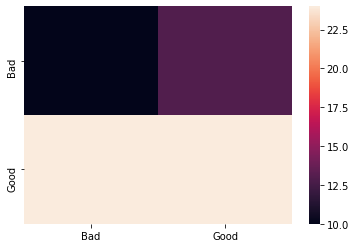

Dummy_macro
The classification report for Dummy_macro
              precision    recall  f1-score   support

         Bad       0.28      0.48      0.35        23
        Good       0.62      0.42      0.50        48

    accuracy                           0.44        71
   macro avg       0.45      0.45      0.43        71
weighted avg       0.51      0.44      0.45        71

The confusion matrix for Dummy_macro


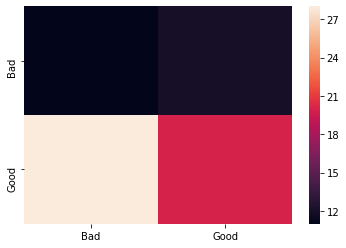

In [22]:
show_evaluation(X_test,y_test,estimators[0::3],labels[0::3],["Bad","Good"])

Απ'τον dummy 

GNB_micro
The classification report for GNB_micro
              precision    recall  f1-score   support

         Bad       0.84      0.91      0.87        23
        Good       0.96      0.92      0.94        48

    accuracy                           0.92        71
   macro avg       0.90      0.91      0.91        71
weighted avg       0.92      0.92      0.92        71

The confusion matrix for GNB_micro


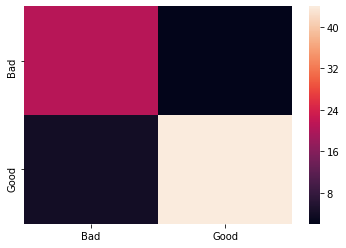

GNB_macro
The classification report for GNB_macro
              precision    recall  f1-score   support

         Bad       0.84      0.91      0.87        23
        Good       0.96      0.92      0.94        48

    accuracy                           0.92        71
   macro avg       0.90      0.91      0.91        71
weighted avg       0.92      0.92      0.92        71

The confusion matrix for GNB_macro


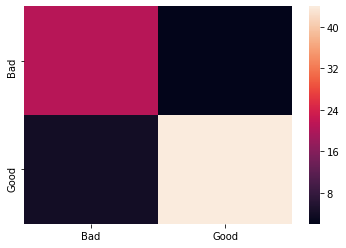

In [23]:
show_evaluation(X_test,y_test,estimators[1::3],labels[1::3],["Bad","Good"])

KNN_micro
The classification report for KNN_micro
              precision    recall  f1-score   support

         Bad       0.94      0.70      0.80        23
        Good       0.87      0.98      0.92        48

    accuracy                           0.89        71
   macro avg       0.91      0.84      0.86        71
weighted avg       0.89      0.89      0.88        71

The confusion matrix for KNN_micro


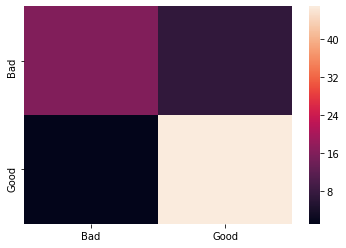

KNN_macro
The classification report for KNN_macro
              precision    recall  f1-score   support

         Bad       0.94      0.70      0.80        23
        Good       0.87      0.98      0.92        48

    accuracy                           0.89        71
   macro avg       0.91      0.84      0.86        71
weighted avg       0.89      0.89      0.88        71

The confusion matrix for KNN_macro


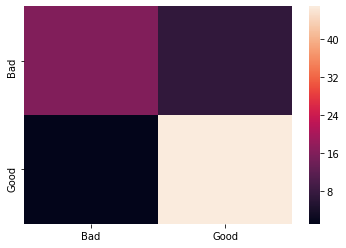

In [24]:
show_evaluation(X_test,y_test,estimators[2::3],labels[2::3],["Bad","Good"])

# Metrics for all classifiers


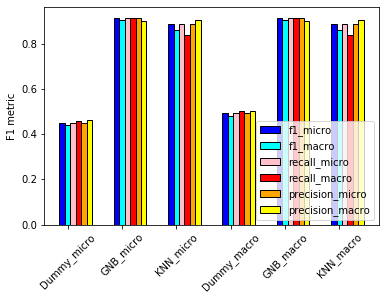

In [25]:
show_metrics(X_test,y_test,estimators,labels,["Bad","Good"])

# Μεγάλο DataSet (B06)

## Βασικές Πληροφορίες

### 1. Σύντομη παρουσίαση του Dataset

Το δεύτερο dataset που θα εξετάσουμε, το μεγάλο, είναι το Semeion. Πρόκειται για ένα πρόβλημα classification χειρόγραφων ψηφίων. <br>
Για τη δημιουργία του dataset χρησιμοποιήθηκαν ψηφία γραμμένα από 80 ανθρώπους. Κάθε ένας σχεδίασε κάθε ψηφίο (από 0 έως 9) δύο φορές. Η 1η ήταν η acurate μορφή (προσπαθώντας να αποδώσει πιστά το ψηφίο) και η 2η ήταν με γρήγορο τρόπο.
Συγκερκριμένα, κάθε δεδομένο προκύπτει από μια εικόνα 16x16 pixels, που περιέχει το σχεδιασμένο ψηφίο σε κλίμακα grayscale, το οποίο μετέπειτα έγινε map σε 0 και 1, ανάλογα με την τιμή των pixel. 

In [161]:
data = pd.read_csv("data/semeion.data",sep=" ",header=None).drop(columns=266)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0


### 2. Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά;

Έχουμε 1593 δείγματα και 256 χαρακτηριστικά. Το είδος των χαρακτηριστικών είναι boolean (0, 1) και δεν υπάρχουν μη διατεταγμένα χαρακτηριστικά.

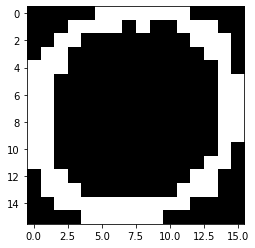

In [162]:
features=data.to_numpy()[:,:256]
labels=data.to_numpy()[:,256:]

import matplotlib.pyplot as plt
pixels = features[6]
pixels = pixels.reshape((16, 16))
plt.imshow(pixels, cmap='gray')
plt.show()

### 3. Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;

Στο αρχείο δεν υπάρχουν επικεφαλίδες, ούτε αρίθμιση γραμμών.

### 4. Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολόνα βρίσκονται; 

Οι ετικέτες των κλάσεων βρίσκονται στις 10 τελευταίες στήλες και είναι σε one hot encoding (η θέση του 1 συμβολίζει την κλάση στην οποία ανήκει).

### 5. Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες;

Από το dataset πήραμε τις 256 πρώτες στήλες ώς features και τις 10 τελευταίες ως labels.

In [163]:
features=data.to_numpy()[:,:256]
labels=data.to_numpy()[:,256:]

### 6. Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου; 

Τα δεδομένα μας δεν περιέχουν missing values. 

In [164]:
data.isnull().values.any()

False

### 7. Ποιος είναι ο αριθμός των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Αν θεωρήσουμε ότι ένα dataset είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (60%-40% σε binary datasets) εκτιμήστε την ισορροπία του dataset.

Ο αριθμός των κλάσεων είναι 10.

In [165]:
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc=enc.fit(unique_labels(labels).reshape(-1, 1))

labelsN = enc.inverse_transform(labels).reshape(1,len(labels))[0]
classes = unique_labels(labels)
Pall = []
for label in classes:
    P=100*sum(labelsN==label)/len(labelsN)
    Pall.append(P)
  
print("Η ισορροπία του dataset "+str(round(max(Pall)/min(Pall),2)))

Η ισορροπία του dataset 1.05


### 8. Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.

Χωρίζουμε τα χαρακτηριστικά μας σε train και test sets.

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(features,labelsN,test_size=0.3,shuffle=True,random_state=20204)

# Ταξινόμηση


Οι ταξινομητές που θα εξετάσετε στο μεγάλο dataset είναι οι: dummy, Gaussian Naive Bayes, kΝΝ, Multi-Layer Perceptron (MLP), Support Vector Machines (SVM)

Σε αυτό το dataset θα δούμε τους 5 παρακάτω Classifiers: 
* Dummy Classifier
* Gaussian Naïve Bayes Classifier
* K - Νearest Neighbors: Ο kNN είναι ταξινομητής όπου λαμβάνει υπόψιν τους k πιο κοντινούς γείτονες. 
* Multi-Layer Perceptron (MLP): Ο MLP (Multi-Layer Perceptrons) classifier είναι ένας ταξινομητής που υλοποιεί ένα βαθύ νευρωνικό δίκτυο. Έχει αρκετές υπερ παραμέτρους που αφορούν την αρχιτεκτονική και την υλοποίηση της εκμάθησης του νευρωνικού. 
* Support Vector Machines (SVM): Ο SVM (support vector machines) επιλύει το πρόβλημα του διαχωρισμού δύο κλάσεων με την εύρεση της βέλτιστης διαχωριστικής επιφάνειας. Ώς βέλτιστη διαχωριστική επιφάνεια ορίζουμε την επιφάνεια που έχει το μεγαλύτερο margin (περιθώριο από τα δείγματα).  

[RBF](fig/svm.png)

Επειδή αρκετά προβλήματα δεν είναι γραμμικά διαχωρίσιμα, έχουμε την δυνατότητα να μετατρέψουμε τον χώρο με ένα Kernel ώστε τα δεδομένα μας να είναι γραμμικά διαχωρίσιμα. 

[RBF](fig/kernal.png)

Το πρόβλημα για multi class classification επιλύεται με μία one-vs-one στρατηγική.


In [195]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

### Baseline Classification

### 1. Διαχειριστείτε τυχόν απουσιάζουσες τιμές. Εκπαιδεύστε στο train τους classifiers με default τιμές (απλή αρχικοποίηση). Κάντε εκτίμηση στο test set (μαζί με τους dummy) και τυπώστε για κάθε estimator: confusion matrix, f1-micro average και f1-macro average.

### 2. Για κάθε averaged metric, εκτυπώστε bar plot συγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers.

### 3. Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης

In [197]:
# init classifiers
clf_Dummy=DummyClassifier(strategy="stratified")
clf_KNN=KNeighborsClassifier(n_jobs=-1)
clf_GNB=GaussianNB()
clf_MLP=MLPClassifier()
clf_lSVC=LinearSVC()
clf_SVC=SVC()

#fit train set's data
clf_Dummy=clf_Dummy.fit(X_train,y_train)
clf_KNN=clf_KNN.fit(X_train,y_train)
clf_GNB=clf_GNB.fit(X_train,y_train)
clf_MLP=clf_MLP.fit(X_train,y_train)
clf_lSVC=clf_lSVC.fit(X_train,y_train)
clf_SVC=clf_SVC.fit(X_train,y_train)

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Dummy
The classification report for Dummy
              precision    recall  f1-score   support

           0       0.06      0.07      0.06        43
           1       0.09      0.08      0.09        50
           2       0.17      0.09      0.12        54
           3       0.05      0.06      0.05        48
           4       0.19      0.15      0.16        54
           5       0.08      0.06      0.07        49
           6       0.10      0.13      0.12        45
           7       0.05      0.05      0.05        43
           8       0.09      0.11      0.10        45
           9       0.02      0.02      0.02        47

    accuracy                           0.08       478
   macro avg       0.09      0.08      0.08       478
weighted avg       0.09      0.08      0.09       478

The confusion matrix for Dummy


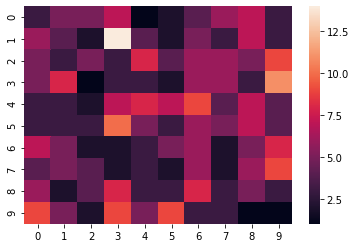

In [169]:
show_evaluation(X_test,y_test,[clf_Dummy],["Dummy"],list(classes.astype(str)))

GNB
The classification report for GNB
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        43
           1       0.49      0.92      0.64        50
           2       1.00      0.48      0.65        54
           3       0.97      0.75      0.85        48
           4       0.85      0.72      0.78        54
           5       0.82      0.86      0.84        49
           6       0.91      0.96      0.93        45
           7       0.84      0.98      0.90        43
           8       0.71      0.80      0.75        45
           9       0.89      0.72      0.80        47

    accuracy                           0.79       478
   macro avg       0.84      0.80      0.80       478
weighted avg       0.84      0.79      0.80       478

The confusion matrix for GNB


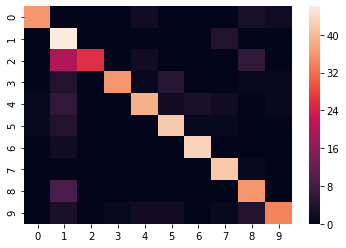

In [170]:
show_evaluation(X_test,y_test,[clf_GNB],["GNB"],list(classes.astype(str)))

KNN
The classification report for KNN
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.80      0.98      0.88        50
           2       0.94      0.89      0.91        54
           3       0.83      1.00      0.91        48
           4       0.98      0.91      0.94        54
           5       0.90      0.96      0.93        49
           6       0.92      1.00      0.96        45
           7       0.95      0.84      0.89        43
           8       0.90      0.80      0.85        45
           9       0.94      0.70      0.80        47

    accuracy                           0.90       478
   macro avg       0.91      0.90      0.90       478
weighted avg       0.91      0.90      0.90       478

The confusion matrix for KNN


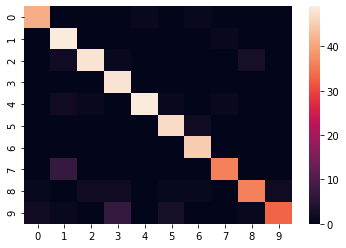

In [171]:
show_evaluation(X_test,y_test,[clf_KNN],["KNN"],list(classes.astype(str)))

MLP
The classification report for MLP
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.88      0.98      0.92        50
           2       0.93      0.94      0.94        54
           3       0.94      0.94      0.94        48
           4       0.96      0.91      0.93        54
           5       0.98      0.94      0.96        49
           6       0.96      0.98      0.97        45
           7       0.91      0.93      0.92        43
           8       0.83      0.84      0.84        45
           9       0.87      0.87      0.87        47

    accuracy                           0.92       478
   macro avg       0.92      0.92      0.92       478
weighted avg       0.92      0.92      0.92       478

The confusion matrix for MLP


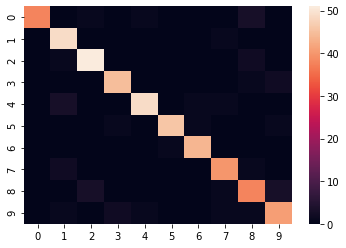

In [172]:
show_evaluation(X_test,y_test,[clf_MLP],["MLP"],list(classes.astype(str)))

SVC
The classification report for SVC
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.91      1.00      0.95        50
           2       0.96      0.94      0.95        54
           3       0.92      1.00      0.96        48
           4       0.98      0.91      0.94        54
           5       0.92      0.96      0.94        49
           6       1.00      0.98      0.99        45
           7       0.95      0.95      0.95        43
           8       0.90      0.96      0.92        45
           9       0.95      0.87      0.91        47

    accuracy                           0.95       478
   macro avg       0.95      0.95      0.95       478
weighted avg       0.95      0.95      0.95       478

The confusion matrix for SVC


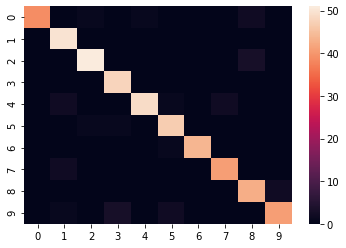

In [173]:
show_evaluation(X_test,y_test,[clf_SVC],["SVC"],list(classes.astype(str)))

# Metrics for all classifiers


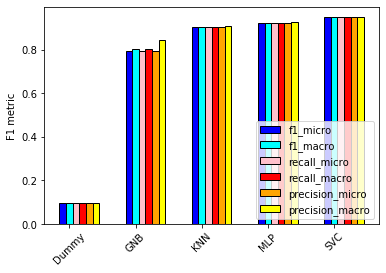

In [176]:
show_metrics(X_test,y_test,[clf_Dummy,clf_GNB,clf_KNN,clf_MLP,clf_SVC],["Dummy","GNB","KNN","MLP","SVC"],list(classes.astype(str)))

## Βελτιστοποίηση ταξινομητών

Στην συνέχεια, θα προσπαθήσουμε να βελτιστοποιήσουμε τους παραπάνω classifiers με την διαδικασία του preprocessing. 

Στον **kNN** προσπαθούμε να βελτιστοποιήσουμε τις υπερπαραμέτρους  n_neighbors, metric και weights: <br>

* n_neighbors: Το n_neighbors αφορά τον αριθμό των γειτόνων που λαμβάνουμε υπόψιν. 
* metric: Το weights παίρνει την τιμή “uniform”, στην οποία μετράμε όλους τους γείτονες ισότιμα, ή τιμή “distance”, όπου ανάλογα με την απόσταση, οι πιο κοντινοί κόμβοι έχουν μεγαλύτερη επιρροή. 
* weights: Το metric είναι η μετρική απόστασης για το tree, δηλαδή ο τρόπος που μετράμε την απόσταση. Η  default τιμή του για real-valued vector spaces είναι το minkowski και εμείς προσθέσαμε και τις euclidean, manhattan, minkowski και seuclidean.

Για τον **MLP** χρησιμοποιούμε τις εξής υπερπαραμέτρους που θα προσπαθήσουμε να βελτιστοποιήσουμε είναι οι παρακάτω: <br>

* hidden_layer_sizes: Αριθμός νευρόνων στα κρυφά επίπεδα του νευρωνικού. Χρησιμοποιήθηκε μόνο ένα κρυφό επίπεδο. 
* Activation: Συνάρτηση ενεργοποίησης του κάθε νευρώνα.
* Solver: Η υλοποίηση του τρόπου πα θα εκτελεστεί ο backpropagation και η ενημέρωση των βαρών.
* Max_iter: Μέγιστος αριθμός εποχών που θα τρέξει η εκπαίδευση του νευρωνικού (backpropagation)
* Learning_rate: Η παράμετρος εκμάθησης για την ενημέρωση του αλγορίθμου. Όπου πέρα από την σταθερά εξετάστηκαν και παραμετρικές συναρτήσεις.

Οι υπερπαράμετροι που θα προσπαθήσουμε να βελτιστοποιήσουμε συνολικά στο **SVC** είναι οι παρακάτω: <br>

* kernel: Προσδιορίζει τον πυρήνα (kernel) που θα χρησιμοποιηθεί στον αλγόριθμο. Εμείς επιλέγουμε ανάμεσα σε poly και rbf. Τον linear τον έχουμε σε ξεχωριστή περίπτωση.
* C (all): Είναι μια παράμετρος κόστους την οποία πληρώνουμε για τα misclassification. Μικρό C επιτρέπει να κάποια misclassification ώστε να έχουμε καλύτερη λειτουργία στα δεδομένα που δεν βρίσκονται στο train set.
* degree (poly only): Η τάξη της πολυωνυμικής συνάρτησης του πυρήνα.
* gamma (poly, rbf): Αυτή η παράμετρος καθορίζει την επιρροή του κάθε δεδομένου. Μικρές τιμές σημαίνουν μεγάλη επιρροή. 
* tol (all): Ορίζει να σταματήσει όταν φτάσουμε μια συγκεκριμένη tolerance, δηλαδή είμαστε κοντά στο στόχο μας.
* loss (linear only): Ορίζει τη συνάρτηση κόστους (loss function). Αυτή καθορίζει την απόσταση prediction - actual label.

In [252]:
# υπερπαράμετροι του pre-processing 
vthreshold = [0,0.05,0.1,0.5]
n_components = [200,150,100]

# οι υπερπαράμετροι του ταξινομητή kNN
k = [1,3, 5,7, 9, 11, 21, 31]
weights = ["uniform","distance"]
metric = ["euclidean", "manhattan" ,"minkowski", "seuclidean"]

# οι υπερπαράμετροι του ταξινομητή MLP
hidden_layer_sizes = [(500,),(400,),(300,),(100,)]
activation = ["identity", "logistic", "tanh", "relu"]
solver = ["lbfgs", "sgd", "adam"]
max_iter = [500, 200, 100]
learning_rate = ["constant", "invscaling", "adaptive"] 
alpha = np.logspace(-5, 1, 4)

# οι υπερπαράμετροι του ταξινομητή LinearSVC
l_loss = ["hinge", "squared_hinge"]
l_tol = np.logspace(-5, -1, 4)
l_C = [1, 5, 10, 50, 100]

# οι υπερπαράμετροι του ταξινομητή SVC (poly,rbf)
kernel = ["poly","rbf"]
C = [1, 5, 10, 50, 100]
degree = [2,3,5]           #rbf ignores degree
gamma = ["scale", "auto"]
tol = np.logspace(-5, -1, 4)

In [257]:
from sklearn.decomposition import PCA

selector = VarianceThreshold()
ros = RandomOverSampler()
pca = PCA()

#scoring=["f1_micro","f1_macro"]

pipe_Dummy = Pipeline(steps=[('selector', selector), ('pca', pca), ('dummy', clf_Dummy)], memory = 'tmp')
pipe_GNB = Pipeline(steps=[('selector', selector), ('pca', pca), ('gnb', clf_GNB)],memory = 'tmp')
pipe_KNN = Pipeline(steps=[('selector', selector), ('pca', pca), ('knn', clf_KNN)], memory = 'tmp')
pipe_MLP = Pipeline(steps=[('selector', selector), ('pca', pca), ('mlp', clf_MLP)], memory = 'tmp')
pipe_lSVC = Pipeline(steps=[('selector', selector), ('pca', pca), ('lsvc', clf_lSVC)], memory = 'tmp')
pipe_SVC = Pipeline(steps=[('selector', selector), ('pca', pca), ('svc', clf_SVC)], memory = 'tmp')

estimator_Dummy_micro = GridSearchCV(pipe_Dummy, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring="f1_micro", n_jobs=-1)
estimator_GNB_micro = GridSearchCV(pipe_GNB, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring="f1_micro", n_jobs=-1)
estimator_KNN_micro = GridSearchCV(pipe_KNN, dict(selector__threshold=vthreshold,pca__n_components=n_components,knn__n_neighbors=k,knn__weights=weights,knn__metric=metric), cv=5, scoring="f1_micro", n_jobs=-1)
estimator_MLP_micro = GridSearchCV(pipe_MLP, dict(selector__threshold=vthreshold,pca__n_components=n_components,mlp__hidden_layer_sizes=hidden_layer_sizes,mlp__activation=activation,mlp__solver=solver,mlp__max_iter=max_iter,mlp__learning_rate=learning_rate,mlp__alpha=alpha), cv=5, scoring="f1_micro", n_jobs=-1)
estimator_lSVC_micro = GridSearchCV(pipe_lSVC, dict(selector__threshold=vthreshold,pca__n_components=n_components,lsvc__loss=l_loss,lsvc__tol=l_tol,lsvc__C=l_C), cv=5, scoring=scoring, n_jobs=-1)
estimator_SVC_micro = GridSearchCV(pipe_SVC, dict(selector__threshold=vthreshold,pca__n_components=n_components,svc__kernel=kernel,svc__C=C,svc__degree=degree,svc__gamma=gamma,svc__tol=tol), cv=5, scoring="f1_micro", n_jobs=-1)

estimator_Dummy_macro = GridSearchCV(pipe_Dummy, dict(selector__threshold=vthreshold,pca__n_components=n_components), cv=5, scoring="f1_macro", n_jobs=-1)
estimator_GNB_macro = GridSearchCV(pipe_GNB, dict(selector__threshold=vthreshold,pca__n_components=n_components), cv=5, scoring="f1_macro", n_jobs=-1)
estimator_KNN_macro = GridSearchCV(pipe_KNN, dict(selector__threshold=vthreshold,pca__n_components=n_components,knn__n_neighbors=k,knn__weights=weights,knn__metric=metric), cv=5, scoring="f1_macro", n_jobs=-1)
estimator_MLP_macro = GridSearchCV(pipe_MLP, dict(selector__threshold=vthreshold,pca__n_components=n_components,mlp__hidden_layer_sizes=hidden_layer_sizes,mlp__activation=activation,mlp__solver=solver,mlp__max_iter=max_iter,mlp__learning_rate=learning_rate,mlp__alpha=alpha), cv=5, scoring="f1_macro", n_jobs=-1)
estimator_lSVC_macro = GridSearchCV(pipe_lSVC, dict(selector__threshold=vthreshold,pca__n_components=n_components,lsvc__loss=l_loss,lsvc__tol=l_tol,lsvc__C=l_C), cv=5, scoring="f1_macro", n_jobs=-1)
estimator_SVC_macro = GridSearchCV(pipe_SVC, dict(selector__threshold=vthreshold,pca__n_components=n_components,svc__kernel=kernel,svc__C=C,svc__degree=degree,svc__gamma=gamma,svc__tol=tol), cv=5, scoring="f1_macro", n_jobs=-1)

In [258]:
#untrained_estimators=[estimator_Dummy_micro,estimator_GNB_micro,estimator_KNN_micro,estimator_Dummy_macro,estimator_GNB_macro,estimator_KNN_macro]
labels=["Dummy_micro","GNB_micro","KNN_micro","MLP_micro","linearSVC_micro","SVC_micro","Dummy_macro","GNB_macro","KNN_macro","MLP_macro","linearSVC_macro","SVC_macro"]
untrained_estimators=[estimator_Dummy_micro,estimator_GNB_micro,estimator_KNN_micro,estimator_MLP_micro,estimator_lSVC_micro,estimator_SVC_micro, estimator_Dummy_macro, estimator_GNB_macro,estimator_KNN_macro,estimator_MLP_macro,estimator_lSVC_macro,estimator_SVC_macro]

estimators, stats= get_best_parameters(X_train, y_train,untrained_estimators,labels)

KeyboardInterrupt: 

In [ ]:
stats.style.background_gradient(cmap ='RdYlBu') 

In [ ]:
show_metrics(X_test,y_test,estimators,labels,list(classes.astype(str)))